In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
# Load the datasets
df = pd.read_csv('train.csv', keep_default_na=False)
df_test = pd.read_csv('test.csv', keep_default_na=False)

In [ ]:
# Check the data types of the datasets
print("Dataframe type: " + str(type(df)))
print("Test Dataframe type: " + str(type(df_test)))

Dataframe type: <class 'pandas.core.frame.DataFrame'>
Test Dataframe type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Check the shape of the train dataset
df.shape

(1460, 81)

In [ ]:
# Check the shape of the test dataset
df_test.shape

(1459, 80)

In [ ]:
# Show statistical summary of the df dataset
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# List column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Show data types of each column
print(df.dtypes.to_string())

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

In [ ]:
# Feature Engineering
# Create new feature 'Age' based on YearSold and YearBuilt and drop YearSold and YearBuilt
df['Age'] = df ['YrSold'] - df['YearBuilt']

df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Normal,208500,5
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,WD,Normal,181500,31
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,WD,Normal,223500,7
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Abnorml,140000,91
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,WD,Normal,250000,8


In [ ]:
# Repeating the process for test data
df_test['Age'] = df_test['YrSold'] - df_test['YearBuilt']

df_test.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,WD,Normal,49
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,WD,Normal,52
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,WD,Normal,13
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,WD,Normal,12
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,WD,Normal,18


In [ ]:
# Calculate correlation with SalePrice and sort by correlation value
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
corr_target = corr['SalePrice'].sort_values(ascending=False)
print("Top 10 Features correlated with SalePrice:")
print(corr_target.head(10))

Top 10 Features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


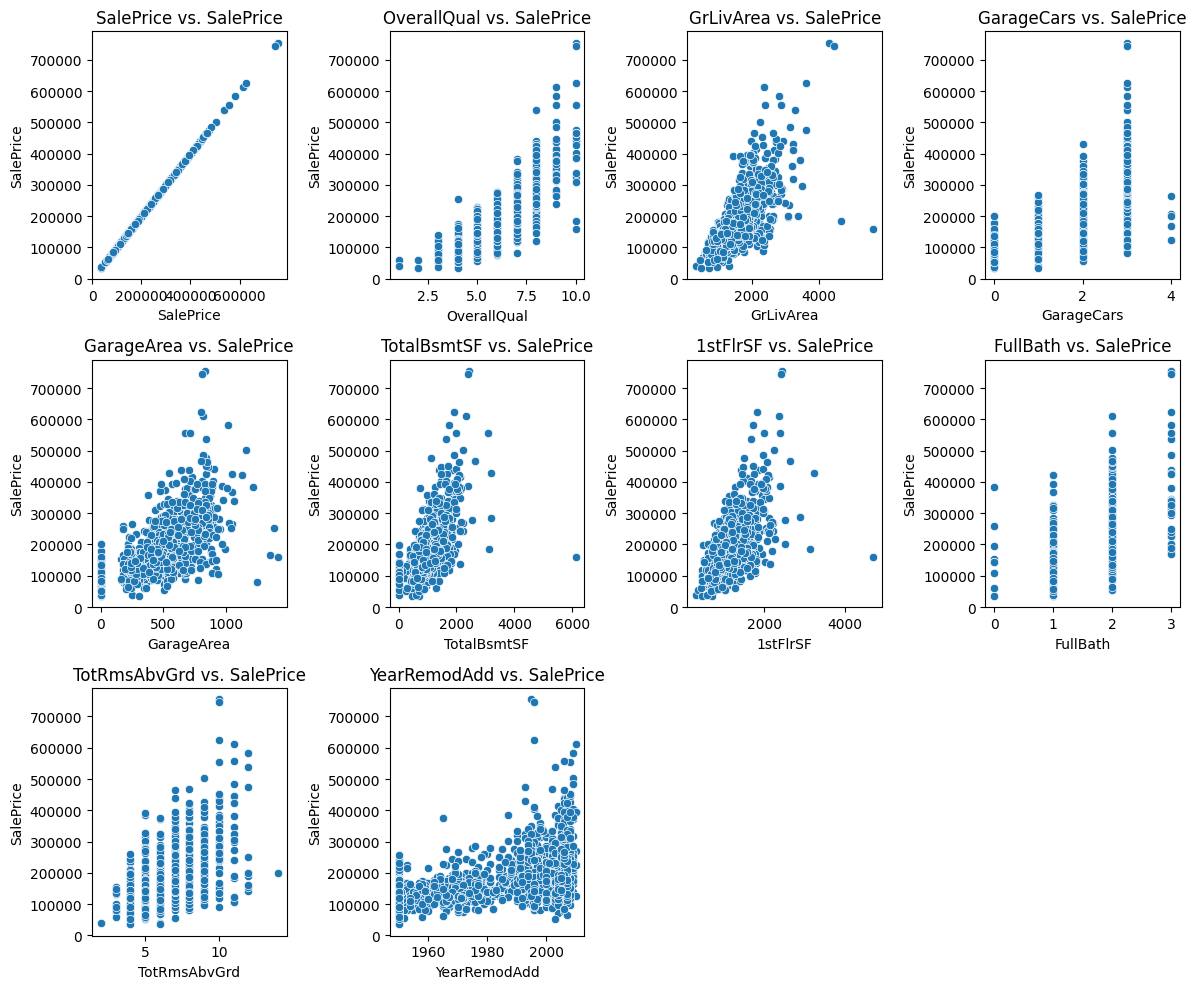

In [ ]:
# Plot scatter plots for top 10 features correlated with SalePrice
top_corr_features = corr_target.head(10)

plt.figure(figsize=(12, 10))

# Iterate through top features and create a scatter plot
for i, feature in enumerate(top_corr_features.index):
    plt.subplot(3, 4, i + 1)  # Create a subplot for each feature
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'{feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()



In [ ]:
# Apply log transformation to SalePrice for model accuracy
df['LogSalePrice'] = np.log(df['SalePrice'])

In [ ]:
# Model Preparation
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'Age']

# Convert columns to numeric if needed and fill missing values with the mean
for col in selected_features:
    if col in df.columns:
        # Convert columns to numeric if necessary
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())  # Fill missing values with the column mean

    if col in df_test.columns:
        df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
        df_test[col] = df_test[col].fillna(df_test[col].mean())  # Fill missing values with the column mean

In [ ]:
# Check for any remaining missing values in the selected features of df_test
print(df_test[selected_features].isnull().sum())

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
1stFlrSF       0
FullBath       0
Age            0
dtype: int64


In [ ]:
# Split data into features (X) and target (y)
X = df[selected_features]
y = df['LogSalePrice']  # Use the log-transformed SalePrice

In [ ]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the Linear Regression model
y_train_pred_lin = lin_model.predict(X_train)
y_val_pred_lin = lin_model.predict(X_val)
# Calculate Root Mean Squared Error for training and validation sets
train_rmse_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))  # Training RMSE
val_rmse_lin = np.sqrt(mean_squared_error(y_val, y_val_pred_lin))  # Validation RMSE

print(f"Training RMSE (Linear Regression): {train_rmse_lin}")
print(f"Validation RMSE (Linear Regression): {val_rmse_lin}")

Training RMSE (Linear Regression): 0.1729238388909276
Validation RMSE (Linear Regression): 0.17359777293013154


In [ ]:
# Prepare for predictions on the test data
X_test = df_test[selected_features]

In [ ]:
# Make predictions on the test data using the Linear Regression model
test_predictions_log = lin_model.predict(X_test)
test_predictions = np.exp(test_predictions_log)  # Inverse the log-transformation to get actual predictions

In [ ]:
#Create a submission DataFrame
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': test_predictions})

In [ ]:
# Print the first few rows of the submission file
print("First few rows of the submission file:")
print(submission.head())

# Save the submission
submission.to_csv('submission.csv', index=False)

# Confirm the submission file has been saved
print("Submission.csv created")


First few rows of the submission file:
     Id      SalePrice
0  1461  116301.266018
1  1462  146535.945095
2  1463  160836.120842
3  1464  177585.020321
4  1465  208578.366787
Submission.csv created
